## Imports

In [1]:
import gym
from gym.envs.box2d.lunar_lander import heuristic
import imageio
from IPython.display import Image
import logging
import matplotlib.pyplot as plt

saveImgs = False

## Get LunarLander env

In [2]:
env = gym.make('LunarLander-v2')
env._max_episode_steps = 250
gym.logger.setLevel(logging.ERROR)

## Useful functions

In [4]:
def run_episodes(env, policy):
    frames = []
    observation = env.reset()
    done = False
    while not done:
        frames.append(env.render(mode='rgb_array'))
        action = policy(env, observation)
        observation, reward, done, info = env.step(action)
    return frames

## Heuristic policy test

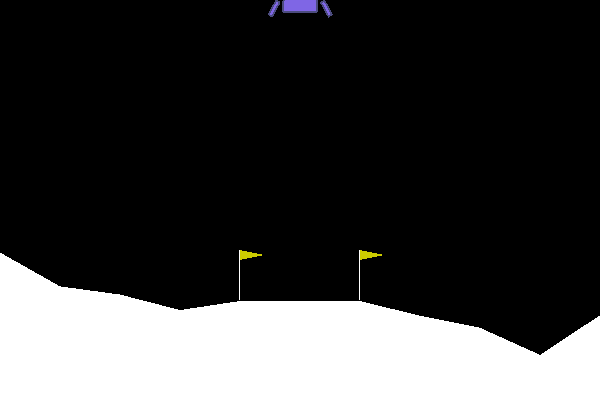

In [11]:
def heuristic_policy(env, observation):
    return heuristic(env.unwrapped, observation)

episodes = run_episodes(env, heuristic_policy)
if saveImgs:
    imageio.mimsave('imgs/heuristic_policy.gif', episodes, fps=45)
Image("imgs/heuristic_policy.gif")

## Random policy test

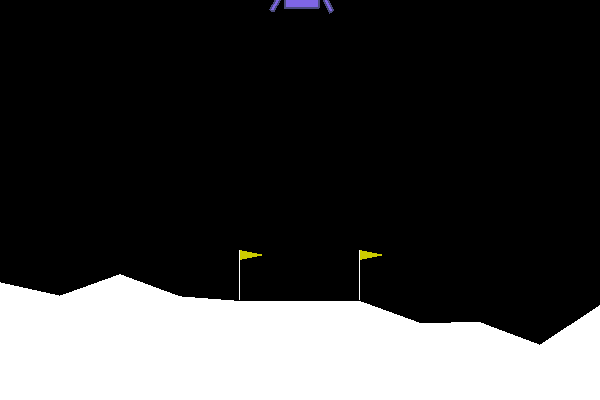

In [16]:
def random_policy(env, observation):
    return env.action_space.sample()
episodes = run_episodes(env, random_policy)
if saveImgs:
    imageio.mimsave('imgs/random_policy.gif', episodes, fps=45)
Image("imgs/random_policy.gif")